In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew


In [ ]:
Los objetivos de hoy son:
Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:
Tabla de contingencia
Coeficiente de correlacón de las variables numéricas del dataset.
Sesgos de alguna de las variables numéricas del dataset.
Intervalo de confianza de algunas de las variables numéricas del dataset
Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor 
posible la naturaleza de los mismos.

In [40]:
df = pd.read_csv("books.csv")
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [41]:
df_copia = df.copy()

Hacemos una copia de nuestro df para utilizarlo en algunos ejercicios.

Tablas de contigencia

In [42]:
df["User Rating"].unique()

array([4.7, 4.6, 4.8, 4.4, 4.5, 3.9, 4.3, 4.2, 4.9, 3.8, 3.6, 4. , 4.1,
       3.3])

In [43]:
bins = [3,3.5,4,4.5, 5]
#arange


In [44]:
df_copia["User_rating_group"] = pd.cut(df["User Rating"], bins = bins)
df_copia.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre,User_rating_group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,"(4.5, 5.0]"
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,"(4.5, 5.0]"
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,"(4.5, 5.0]"
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"(4.5, 5.0]"
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"(4.5, 5.0]"


In [45]:
contig_num= pd.crosstab(df_copia["User_rating_group"], df["Genre"])
contig_num

Genre,Fiction,Non Fiction
User_rating_group,,
"(3.0, 3.5]",1,0
"(3.5, 4.0]",11,9
"(4.0, 4.5]",46,91
"(4.5, 5.0]",182,210


Hemos hecho nuestra tabla de contigencia con una variable numérica y una categórica. Observamos que los libros del género **Non Fiction** tiene una frecuencia mayor en altas valoraciones de l@s usuria@s. En todos los rangos

También vemos que la frecuencia de valoraciones altas (de 4.5 a 5.0) es muy superior tanto para el génerp **Fiction** como **Non Fiction**. Esto tiene sentido porque nuestros datos son los libros más vendidos (mejor valorados -> más se venden)

In [48]:
contig = pd.crosstab(df["Genre"], df["Author"])
contig

Author,Abraham Verghese,Adam Gasiewski,Adam Mansbach,Adir Levy,Admiral William H. McRaven,Adult Coloring Book Designs,Alan Moore,Alex Michaelides,Alice Schertle,Allie Brosh,...,Todd Burpo,Tony Hsieh,Tucker Carlson,Veronica Roth,W. Cleon Skousen,Walter Isaacson,William Davis,William P. Young,Wizards RPG Team,Zhi Gang Sha
Genre,,,,,,,,,,,,,,,,,,,,,
Fiction,2,0,1,1,0,0,1,1,1,0,...,0,0,0,4,0,0,0,2,3,0
Non Fiction,0,1,0,0,1,1,0,0,0,1,...,2,1,1,0,1,3,2,0,0,2


Al utilizar dos variables categóricas de nuestro df observamos que en principio no podemos sacar conclusiones debido a la naturaleza de nuestros datos.

Coeficiente de correlación de Pearson

In [49]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [ ]:
df["Price"], df["Year"])

In [51]:
df_numericas = df.select_dtypes(exclude = "object")
df_numericas

,User Rating,Reviews,Price,Year
0,4.7,17350,8,2016
1,4.6,2052,22,2011
2,4.7,18979,15,2018
3,4.7,21424,6,2017
4,4.8,7665,12,2019
...,...,...,...,...
545,4.9,9413,8,2019
546,4.7,14331,8,2016
547,4.7,14331,8,2017
548,4.7,14331,8,2018


In [53]:
cor2 = np.corrcoef(df_numericas)
cor2

array([[1.        , 0.67648345, 0.9999494 , ..., 0.99969249, 0.99969073,
        0.99968896],
       [0.67648345, 1.        , 0.66904587, ..., 0.69453735, 0.69458848,
        0.6946396 ],
       [0.9999494 , 0.66904587, 1.        , ..., 0.99939257, 0.99939009,
        0.99938761],
       ...,
       [0.99969249, 0.69453735, 0.99939257, ..., 1.        , 1.        ,
        0.99999999],
       [0.99969073, 0.69458848, 0.99939009, ..., 1.        , 1.        ,
        1.        ],
       [0.99968896, 0.6946396 , 0.99938761, ..., 0.99999999, 1.        ,
        1.        ]])

In [29]:
cor = np.corrcoef(df["User Rating"]df["Reviews"])
cor

array([[ 1.        , -0.00172901],
       [-0.00172901,  1.        ]])

Sesgos de alguna variable numérica

In [57]:
df.head(2)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


In [66]:
media = np.mean(df["Price"])
media

13.1

In [69]:
std = np.std(df["Price"])
std

10.83240089227266

In [64]:
sesgo = skew(df["Price"])
sesgo
# intentamos dibujar la media y la desviación típica ¿varianza, no sé cuál sería más adecuado) en el histograma 

3.674998760184651

Como nuestro valor del sesgo es positivo, deducimos que nuestros valores de Price están sesgado de forma positiva, a la izquierda. 

In [ ]:
x1 = media
x2 = std

<AxesSubplot:ylabel='Frequency'>

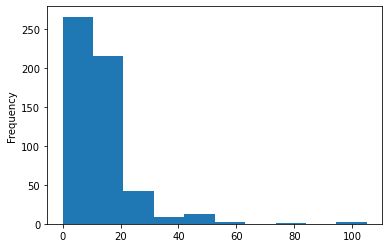

In [72]:
df["Price"].plot.hist()

Como observamos en el histograma, confirmamos que los valores de nuestros precios están sesgados a la izquierda. Así, se soportan nuestras conclusiones del sesgo y de la media.

También se confirma que